In [2]:
import streamlit as st
import pandas as pd

df = pd.read_csv('startup_funding.csv')


In [3]:
#1
df.drop(columns=['Remarks'], inplace=True)

In [4]:
#2
df.set_index('Sr No', inplace=True)

In [5]:
df.head(1)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"


In [6]:
#3
df.rename(columns={
    'Date dd/mm/yyyy' : 'date',
    'Startup Name' : 'startup',
    'Industry Vertical' : 'vertical',
    'SubVertical' : 'subvertical',
    'City  Location' : 'city' ,
    'Investors Name' : 'investors',
    'InvestmentnType' : 'round',
    'Amount in USD' : 'amount'
}, inplace=True)

In [7]:
#4
df['amount'] = df['amount'].fillna('0')

In [8]:
df['amount'] = df['amount'].str.replace(',', '')
df['amount'] = df['amount'].str.replace('undisclosed', '0')
df['amount'] = df['amount'].str.replace('unknown', '0')
df['amount'] = df['amount'].str.replace('Undisclosed', '0')

In [9]:
df= df[df['amount'].str.isdigit()]

In [10]:
df['amount'] = df['amount'].astype('float')

In [11]:
def to_inr(dollar):
    inr = dollar * 83.43
    return inr/10000000

In [12]:
df['amount'] = df['amount'].apply(to_inr)

In [13]:
df['date'] = df['date'].str.replace('05/072018', '05/07/2018')

In [14]:
# date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

C:\Users\5A_Traders\AppData\Local\Temp\ipykernel_24452\2028546739.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [15]:
df = df.dropna(subset=['date','startup', 'vertical', 'city','investors' , 'round', 'amount'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2822 non-null   datetime64[ns]
 1   startup      2822 non-null   object        
 2   vertical     2822 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2822 non-null   object        
 5   investors    2822 non-null   object        
 6   round        2822 non-null   object        
 7   amount       2822 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.4+ KB


In [17]:
df.to_csv('startup_cleaned.csv', index=False)

In [18]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [19]:
df[df['investors'].str.contains('IDG Ventures')].head()[['date', 'startup', 'vertical', 'city', 'round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.962842
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,1001.160000
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,183.546000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.886500
439,2017-07-12,eShakti,Ecommerce,Chennai,Debt Funding,19.188900


In [20]:
df[df['investors'].str.contains('IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Cure Fit                 1001.160000
Lenskart                  500.580000
Bizongo                   208.575000
CureFit                   208.575000
Curefit                   125.145000
Fintellix                 125.145000
Xpressbees                104.287500
FirstCry.com               83.430000
Uniphore                   73.418400
POPxo                      71.749800
HealthifyMe                50.058000
\\xc2\\xa0CloudCherry      50.058000
Sigtuple                   48.389400
Flyrobe                    44.217900
RentMojo                   41.715000
Aasaanjobs                 41.715000
Vayana                     33.372000
Agrostar                   33.372000
PlaySimple                 33.372000
Blowhorn                   30.451950
Tripoto                    29.962842
Active.ai                  25.029000
Heckyl                     22.526100
CreditMantri               20.857500
eShakti                    19.188900
Zimmber                    16.686000
POPxo.com                  16.

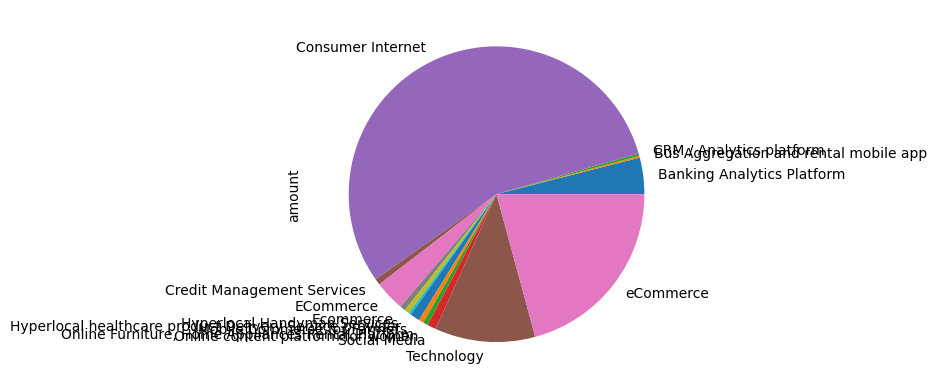

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
df[df['investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')
plt.show()

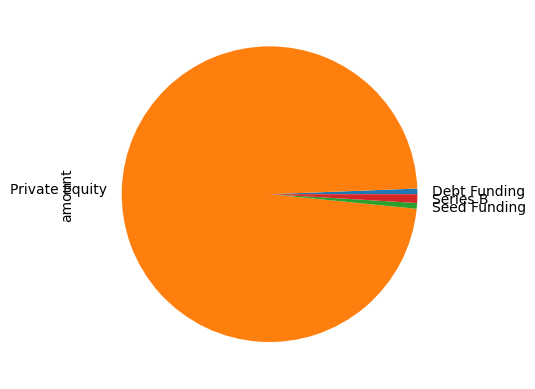

In [26]:
# no. of stages
df[df['investors'].str.contains('IDG Ventures')].groupby('round')['amount'].sum().plot(kind='pie')
plt.show()

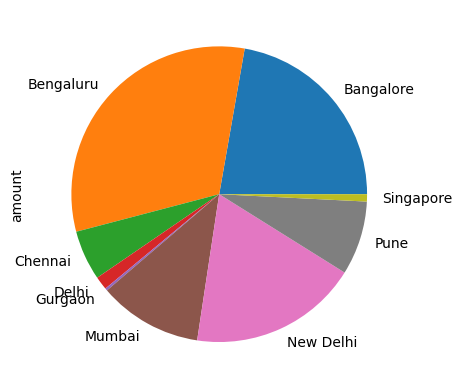

In [27]:
# no. of city
df[df['investors'].str.contains('IDG Ventures')].groupby('city')['amount'].sum().plot(kind='pie')
plt.show()

In [31]:
# 'yoy' investment graph means each year investment
df['year'] = df['date'].dt.year

<AxesSubplot: xlabel='year'>

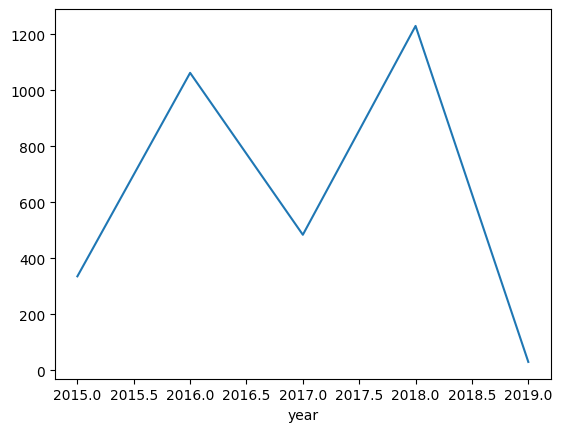

In [32]:
df[df['investors'].str.contains('IDG Ventures')].groupby('year')['amount'].sum().plot()

In [34]:
round(df['amount'].sum())

299834

In [37]:
df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]

32537.7

In [38]:
df.groupby('startup')['amount'].sum().mean()

130.41934202718792

In [40]:
df['startup'].nunique()

2299

In [42]:
df['month'] = df['date'].dt.month

In [44]:
df.groupby(['year', 'month'])['startup'].count().reset_index()

,year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,65
4,2015,5,53
...,...,...,...
58,2019,12,10
59,2020,1,2
60,2020,2,2
61,2020,9,2


In [46]:
temp_df = df.groupby(['year', 'month'])['amount'].sum().reset_index()

In [49]:
temp_df['x_axis'] = temp_df['month'].astype(str) + '-' + temp_df['year'].astype(str)

In [50]:
temp_df[['amount', 'x_axis']]

,amount,x_axis
0,5334.097050,1-2015
1,1584.844623,2-2015
2,1932.197085,3-2015
3,4561.910685,4-2015
4,1417.225410,5-2015
...,...,...
58,3708.463500,12-2019
59,142.234751,1-2020
60,40.046400,2-2020
61,1821.767969,9-2020
